In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
ntry = 10 # 20

L_s = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SW_Sinkhorn_d3").reshape(1,5,ntry)
L_w = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SW_W_d3").reshape(1,5,ntry)
L_fc = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_FC_d3").reshape(1,5,ntry)

L_sw = np.zeros((1, 2, 5, ntry))
for k, proj in enumerate([200, 500]):
    L_sw[0, k] = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SW_projs_"+str(proj)+"_d3")

    
L_swggmc = np.zeros((1, 2, 5, ntry))
for k, proj in enumerate([200, 500]):
    L_swggmc[0, k] = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SWGGMC_projs_"+str(proj)+"_d3")

In [5]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


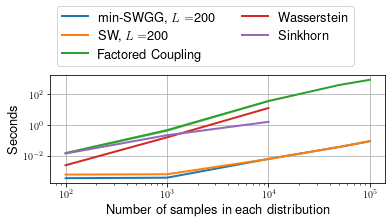

In [9]:
fig = plt.figure(figsize=(6,2))

ds = [3]
samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]

for i, d in enumerate(ds):
    for l, n_projs in enumerate([200]):
        m = np.mean(L_swggmc[i, l], axis=-1)
        s = np.std(L_swggmc[i, l], axis=-1)
        
#         plt.loglog(samples, m, label=r"$\mathrm{min-SWGG}_2$," + r" $L=$"+str(n_projs))
        plt.loglog(samples, m, label=r"min-SWGG," + r" $L=$"+str(n_projs), linewidth=2)
        plt.fill_between(samples, m-s, m+s,alpha=0.5)
        
        m = np.mean(L_sw[i, l], axis=-1)
        s = np.std(L_sw[i, l], axis=-1)
        
#         plt.loglog(samples, m, label=r"$\mathrm{SW}_2$," + r" $L=$"+str(n_projs))
        plt.loglog(samples, m, label=r"SW," + r" $L=$"+str(n_projs), linewidth=2)
        plt.fill_between(samples, m-s, m+s,alpha=0.5)

        

    m_w = np.mean(L_fc[i], axis=-1)
    s_w = np.std(L_fc[i], axis=-1)

    plt.loglog(samples, m_w, label=r"Factored Coupling", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

    m_w = np.mean(L_w[i], axis=-1)
    s_w = np.std(L_w[i], axis=-1)

    plt.loglog(samples, m_w, label=r"Wasserstein", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_s = np.mean(L_s[i], axis=-1)
    s_s = np.std(L_s[i], axis=-1)

    plt.loglog(samples, m_s, label=r"Sinkhorn", linewidth=2)
    plt.fill_between(samples, m_s-s_s, m_s+s_s, alpha=0.5)
    

plt.xlabel("Number of samples in each distribution", fontsize=13)
plt.ylabel("Seconds", fontsize=13)
#     plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
# plt.title("Computational Time", fontsize=13)
plt.grid(True)
# plt.yticks([10,1,0.1,0.01,0.001])
#plt.savefig("./Comparison_Time.pdf", format="pdf", bbox_inches="tight")
plt.show()

/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


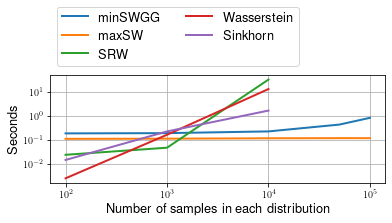

In [10]:
ntry = 10 # 20

L_s = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SW_Sinkhorn_d3").reshape(1,5,ntry)
L_w = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SW_W_d3").reshape(1,5,ntry)
L_fc = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_FC_d3").reshape(1,5,ntry)
L_swgg_optim = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SWGGOptim_d3").reshape(1,5,ntry)
L_maxsw = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_maxSW_d3").reshape(1,5,ntry)
L_srw = np.loadtxt("../Notebook/Results/Sanity_Check/Comparison_SRW_d3").reshape(1,5,ntry)


fig = plt.figure(figsize=(6,2))

ds = [3]
samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]

for i, d in enumerate(ds):   
    
    m_w = np.mean(L_swgg_optim[i], axis=-1)
    s_w = np.std(L_swgg_optim[i], axis=-1)

    plt.loglog(samples, m_w, label=r"minSWGG", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    
    m_w = np.mean(L_maxsw[i], axis=-1)
    s_w = np.std(L_maxsw[i], axis=-1)

    plt.loglog(samples, m_w, label=r"maxSW", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    
    m_w = np.mean(L_srw[i], axis=-1)
    s_w = np.std(L_srw[i], axis=-1)

    plt.loglog(samples, m_w, label=r"SRW", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

#     m_w = np.mean(L_fc[i], axis=-1)
#     s_w = np.std(L_fc[i], axis=-1)

#     plt.loglog(samples, m_w, label=r"Factored Coupling")
#     plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

    m_w = np.mean(L_w[i], axis=-1)
    s_w = np.std(L_w[i], axis=-1)

    plt.loglog(samples, m_w, label=r"Wasserstein", linewidth=2)
    plt.fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_s = np.mean(L_s[i], axis=-1)
    s_s = np.std(L_s[i], axis=-1)

    plt.loglog(samples, m_s, label=r"Sinkhorn", linewidth=2)
    plt.fill_between(samples, m_s-s_s, m_s+s_s, alpha=0.5)
    

plt.xlabel("Number of samples in each distribution", fontsize=13)
plt.ylabel("Seconds", fontsize=13)
#     plt.yscale("log")
    # plt.xscale("log")
    
plt.legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
# plt.title("Computational Time", fontsize=13)
plt.grid(True)
# plt.yticks([0.01,0.1,1])
plt.minorticks_off()

#plt.savefig("./Comparison_Time_optim.pdf", format="pdf", bbox_inches="tight")
plt.show()

/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


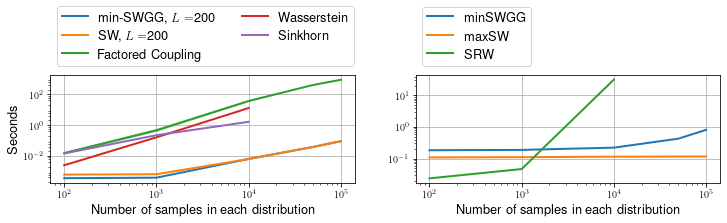

In [11]:
fig, ax = plt.subplots(1,2,figsize=(12,2))

ds = [3]
samples = [int(1e2),int(1e3),int(1e4),int(1e5/2),int(1e5)]

for i, d in enumerate(ds):
    for l, n_projs in enumerate([200]):
        m = np.mean(L_swggmc[i, l], axis=-1)
        s = np.std(L_swggmc[i, l], axis=-1)
        
#         plt.loglog(samples, m, label=r"$\mathrm{min-SWGG}_2$," + r" $L=$"+str(n_projs))
        ax[0].loglog(samples, m, label=r"min-SWGG," + r" $L=$"+str(n_projs), linewidth=2)
        ax[0].fill_between(samples, m-s, m+s,alpha=0.5)
        
        m = np.mean(L_sw[i, l], axis=-1)
        s = np.std(L_sw[i, l], axis=-1)
        
#         plt.loglog(samples, m, label=r"$\mathrm{SW}_2$," + r" $L=$"+str(n_projs))
        ax[0].loglog(samples, m, label=r"SW," + r" $L=$"+str(n_projs), linewidth=2)
        ax[0].fill_between(samples, m-s, m+s,alpha=0.5)

        

    m_w = np.mean(L_fc[i], axis=-1)
    s_w = np.std(L_fc[i], axis=-1)

    ax[0].loglog(samples, m_w, label=r"Factored Coupling", linewidth=2)
    ax[0].fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    

    m_w = np.mean(L_w[i], axis=-1)
    s_w = np.std(L_w[i], axis=-1)

    ax[0].loglog(samples, m_w, label=r"Wasserstein", linewidth=2)
    ax[0].fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)


    m_s = np.mean(L_s[i], axis=-1)
    s_s = np.std(L_s[i], axis=-1)

    ax[0].loglog(samples, m_s, label=r"Sinkhorn", linewidth=2)
    ax[0].fill_between(samples, m_s-s_s, m_s+s_s, alpha=0.5)
    
    
    m_w = np.mean(L_swgg_optim[i], axis=-1)
    s_w = np.std(L_swgg_optim[i], axis=-1)

    ax[1].loglog(samples, m_w, label=r"minSWGG", linewidth=2)
    ax[1].fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    
    m_w = np.mean(L_maxsw[i], axis=-1)
    s_w = np.std(L_maxsw[i], axis=-1)

    ax[1].loglog(samples, m_w, label=r"maxSW", linewidth=2)
    ax[1].fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    
    m_w = np.mean(L_srw[i], axis=-1)
    s_w = np.std(L_srw[i], axis=-1)

    ax[1].loglog(samples, m_w, label=r"SRW", linewidth=2)
    ax[1].fill_between(samples, m_w-s_w, m_w+s_w, alpha=0.5)
    
    

ax[0].set_xlabel("Number of samples in each distribution", fontsize=13)
ax[0].set_ylabel("Seconds", fontsize=13)
ax[0].grid(True)

# ax[0].legend(fontsize=13)
ax[0].legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=2)
# ax[0].yaxis.get_ticklocs(minor=True)
# ax[0].minorticks_on()
# ax[0].tick_params(axis='y', which='both', colors='black')
# ax[0].set_yscale("log")
ax[0].yaxis.get_minor_locator().set_params(numticks=99, subs=[0.2,0.4,0.6,0.8])



ax[1].set_xlabel("Number of samples in each distribution", fontsize=13)
# ax[1].set_ylabel("Seconds", fontsize=13)
ax[1].grid(True)
# ax[1].minorticks_off()
# ax[1].tick_params(axis='y',which='minor',labelbottom=False)
# ax[1].yaxis.set_tick_params(which='minor', right = 'off')
# ax[1].tick_params(axis='y', which='both', colors='black')
# ax[1].set_yscale("log")
# ax[1].yaxis.get_minor_locator().set_params(numticks=99, subs=[])



ax[1].legend(fontsize=13, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=1)

plt.savefig("./Comparison_Time.pdf", format="pdf", bbox_inches="tight")
plt.show()